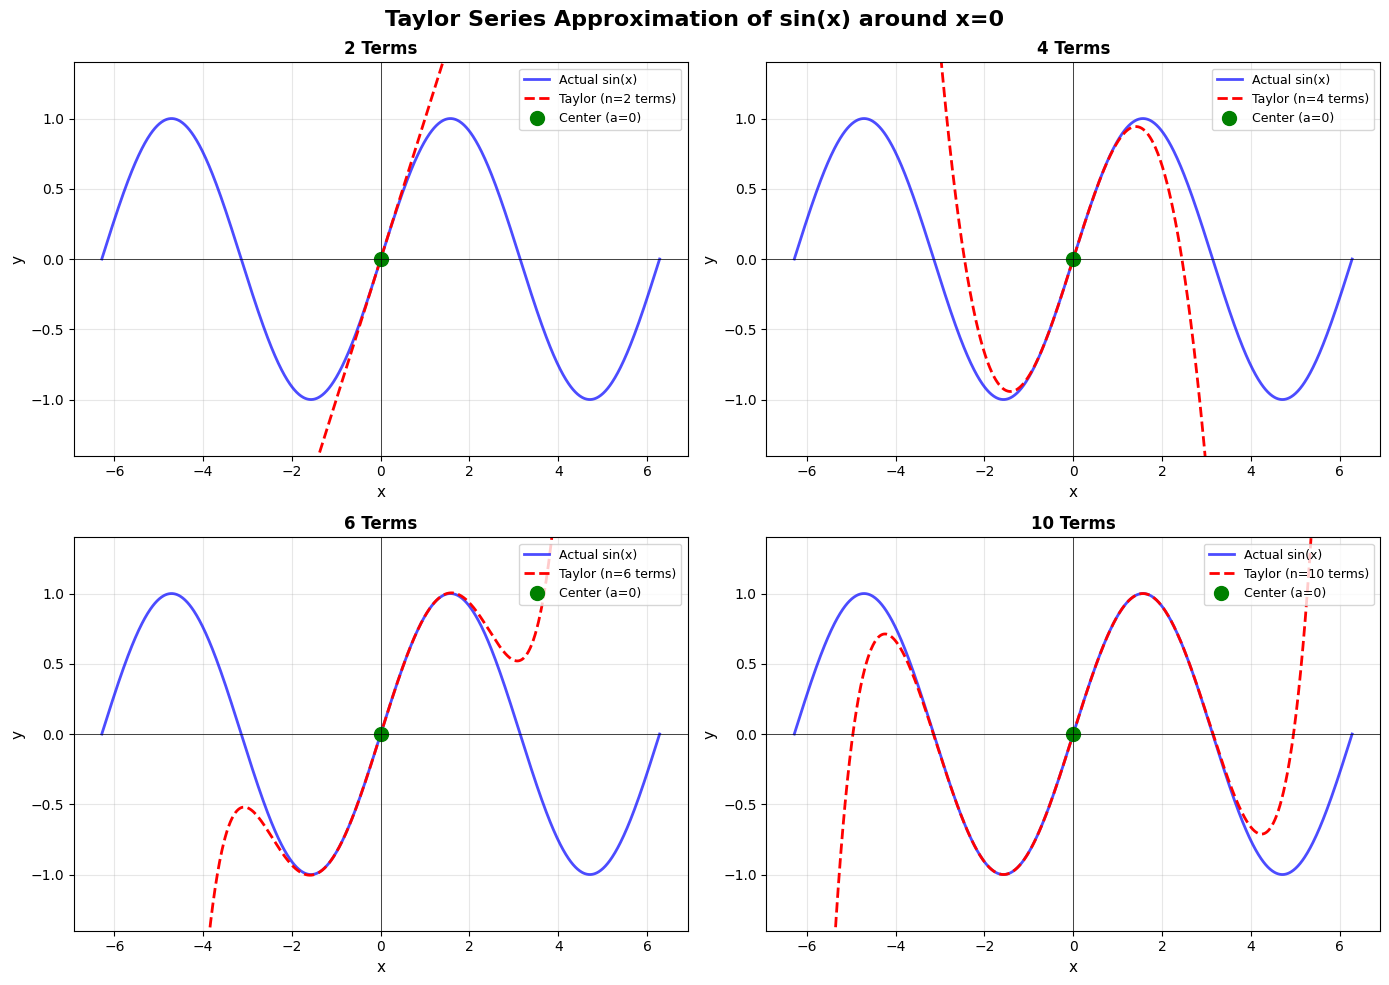


Taylor Series Formula for sin(x) around x=0:
sin(x) ≈ sin(a) + cos(a)(x-a) - sin(a)(x-a)²/2! - cos(a)(x-a)³/3! + ...

As we add more terms, the approximation gets better!
Notice how the red dashed line gets closer to the blue solid line.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

FUNCTION = "sin"  # Options: "sin", "cos", "exp", "log"
CENTER = 0
X_RANGE = (-2*np.pi, 2*np.pi)
MAX_TERMS = 10

def actual_function(x, func_type):
    if func_type == "sin":
        return np.sin(x)
    elif func_type == "cos":
        return np.cos(x)
    elif func_type == "exp":
        return np.exp(x)
    elif func_type == "log":
        return np.log(x)

def taylor_sin(x, a, n_terms):
    result = 0
    for n in range(n_terms):
        if n % 4 == 0:
            derivative = np.sin(a)
        elif n % 4 == 1:
            derivative = np.cos(a)
        elif n % 4 == 2:
            derivative = -np.sin(a)
        else:
            derivative = -np.cos(a)

        result += derivative * (x - a)**n / factorial(n)
    return result

def taylor_cos(x, a, n_terms):
    result = 0
    for n in range(n_terms):
        if n % 4 == 0:
            derivative = np.cos(a)
        elif n % 4 == 1:
            derivative = -np.sin(a)
        elif n % 4 == 2:
            derivative = -np.cos(a)
        else:
            derivative = np.sin(a)

        result += derivative * (x - a)**n / factorial(n)
    return result

def taylor_exp(x, a, n_terms):
    result = 0
    exp_a = np.exp(a)
    for n in range(n_terms):
        result += exp_a * (x - a)**n / factorial(n)
    return result

def taylor_log(x, a, n_terms):
    if a <= 0:
        a = 1  # Default to 1 if invalid
    result = np.log(a)
    for n in range(1, n_terms):
        result += ((-1)**(n+1) / n) * ((x - a) / a)**n
    return result

def get_taylor_function(func_type):
    if func_type == "sin":
        return taylor_sin
    elif func_type == "cos":
        return taylor_cos
    elif func_type == "exp":
        return taylor_exp
    elif func_type == "log":
        return taylor_log

x = np.linspace(X_RANGE[0], X_RANGE[1], 1000)

if FUNCTION == "log": # given that log has to be positive
    if X_RANGE[0] <= 0:
        x = np.linspace(0.1, X_RANGE[1], 1000)
    if CENTER <= 0:
        CENTER = 1

y_actual = actual_function(x, FUNCTION)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Taylor Series Approximation of {FUNCTION}(x) around x={CENTER}',
             fontsize=16, fontweight='bold')

term_counts = [2, 4, 6, MAX_TERMS]
taylor_func = get_taylor_function(FUNCTION)

for idx, (ax, n_terms) in enumerate(zip(axes.flat, term_counts)):
    ax.plot(x, y_actual, 'b-', linewidth=2, label=f'Actual {FUNCTION}(x)', alpha=0.7)

    y_taylor = taylor_func(x, CENTER, n_terms)
    ax.plot(x, y_taylor, 'r--', linewidth=2, label=f'Taylor (n={n_terms} terms)')

    center_y = actual_function(np.array([CENTER]), FUNCTION)[0]
    ax.plot(CENTER, center_y, 'go', markersize=10, label=f'Center (a={CENTER})')

    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('y', fontsize=11)
    ax.set_title(f'{n_terms} Terms', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)

    if FUNCTION == "exp" and n_terms < 6:
        ax.set_ylim(-5, 20)
    elif FUNCTION == "log":
        ax.set_ylim(-3, 3)
    else:
        y_min, y_max = np.min(y_actual), np.max(y_actual)
        margin = (y_max - y_min) * 0.2
        ax.set_ylim(y_min - margin, y_max + margin)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"Taylor Series Formula for {FUNCTION}(x) around x={CENTER}:")
print(f"{'='*60}")
if FUNCTION == "sin":
    print("sin(x) ≈ sin(a) + cos(a)(x-a) - sin(a)(x-a)²/2! - cos(a)(x-a)³/3! + ...")
elif FUNCTION == "cos":
    print("cos(x) ≈ cos(a) - sin(a)(x-a) - cos(a)(x-a)²/2! + sin(a)(x-a)³/3! + ...")
elif FUNCTION == "exp":
    print("e^x ≈ e^a + e^a(x-a) + e^a(x-a)²/2! + e^a(x-a)³/3! + ...")
elif FUNCTION == "log":
    print("ln(x) ≈ ln(a) + (x-a)/a - (x-a)²/(2a²) + (x-a)³/(3a³) - ...")
